In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore",".*")

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


Now let's get the movie titles:

In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


We can merge them together:

In [7]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
####################################
# which user has rated the most ? (absolutly)
# Are there any users that rated the same movie multiple times?
# which user has rated the most ? (time based interval) - hint: use pd.to_datetime, agg
#      + filter only user that have rated for a duration >= 3 months (90 days)

In [9]:
df.user_id.value_counts().sort_values(ascending=False)[:5]

405    737
655    685
13     636
450    540
276    518
Name: user_id, dtype: int64

In [10]:
df100 = df.groupby('user_id')['item_id'].count().sort_values()
df100.tail()

user_id
276    518
450    540
13     636
655    685
405    737
Name: item_id, dtype: int64

In [11]:
df.groupby(['user_id', 'item_id']).count()

rating  timestamp  title
user_id item_id                          
0       50            1          1      1
        133           1          1      1
        172           1          1      1
1       1             1          1      1
        2             1          1      1
...                 ...        ...    ...
943     1067          1          1      1
        1074          1          1      1
        1188          1          1      1
        1228          1          1      1
        1330          1          1      1

[100003 rows x 3 columns]

In [12]:
df2 = df.groupby(['user_id', 'item_id']).count()
df2[df2.rating > 1]

,,rating,timestamp,title
user_id,item_id,,,


In [13]:
df2 = df.copy()

In [14]:
df2['d'] = pd.to_datetime(df2.timestamp, unit='s')
df2.head()

,user_id,item_id,rating,timestamp,title,d
0,0,50,5,881250949,Star Wars (1977),1997-12-04 15:55:49
1,290,50,5,880473582,Star Wars (1977),1997-11-25 15:59:42
2,79,50,4,891271545,Star Wars (1977),1998-03-30 15:25:45
3,2,50,5,888552084,Star Wars (1977),1998-02-27 04:01:24
4,8,50,5,879362124,Star Wars (1977),1997-11-12 19:15:24


In [15]:
df2.sort_values(by='d').tail()

,user_id,item_id,rating,timestamp,title,d
80769,729,313,3,893286638,Titanic (1997),1998-04-22 23:10:38
76502,729,300,4,893286638,Air Force One (1997),1998-04-22 23:10:38
28547,729,748,4,893286638,"Saint, The (1997)",1998-04-22 23:10:38
17205,729,328,3,893286638,Conspiracy Theory (1997),1998-04-22 23:10:38
22124,729,272,4,893286638,Good Will Hunting (1997),1998-04-22 23:10:38


In [16]:
df2.iloc[200,-1] - df2.iloc[1200,-1] 

Timedelta('48 days 11:31:18')

In [17]:
(df2.iloc[200,-1] - df2.iloc[1200,-1]).days

48

In [18]:
df200 = df2.groupby('user_id')['d'].agg([max, min])
df200.head()

,max,min
user_id,,
0,1997-12-04 15:55:49,1997-12-04 15:55:49
1,1998-03-13 01:15:36,1997-09-22 21:57:58
2,1998-03-04 02:57:20,1998-02-27 03:26:00
3,1998-03-07 02:24:42,1998-03-07 02:15:39
4,1998-04-08 03:02:00,1998-04-08 02:09:34


In [19]:
df200['delta'] = df200['max'] - df200['min']
df200.head()

,max,min,delta
user_id,,,
0,1997-12-04 15:55:49,1997-12-04 15:55:49,0 days 00:00:00
1,1998-03-13 01:15:36,1997-09-22 21:57:58,171 days 03:17:38
2,1998-03-04 02:57:20,1998-02-27 03:26:00,4 days 23:31:20
3,1998-03-07 02:24:42,1998-03-07 02:15:39,0 days 00:09:03
4,1998-04-08 03:02:00,1998-04-08 02:09:34,0 days 00:52:26


In [20]:
df200.delta = df200.delta.apply(lambda x : x.days)
df200.head()

,max,min,delta
user_id,,,
0,1997-12-04 15:55:49,1997-12-04 15:55:49,0
1,1998-03-13 01:15:36,1997-09-22 21:57:58,171
2,1998-03-04 02:57:20,1998-02-27 03:26:00,4
3,1998-03-07 02:24:42,1998-03-07 02:15:39,0
4,1998-04-08 03:02:00,1998-04-08 02:09:34,0


In [21]:
df100

user_id
0        3
166     20
418     20
34      20
441     20
      ... 
276    518
450    540
13     636
655    685
405    737
Name: item_id, Length: 944, dtype: int64

In [22]:
df200.reset_index().head(2)

,user_id,max,min,delta
0,0,1997-12-04 15:55:49,1997-12-04 15:55:49,0
1,1,1998-03-13 01:15:36,1997-09-22 21:57:58,171


In [23]:
df100.reset_index().head(2)

,user_id,item_id
0,0,3
1,166,20


In [24]:
df300 = pd.merge(df200.reset_index(), df100.reset_index(), on='user_id')
df300.head()

,user_id,max,min,delta,item_id
0,0,1997-12-04 15:55:49,1997-12-04 15:55:49,0,3
1,1,1998-03-13 01:15:36,1997-09-22 21:57:58,171,272
2,2,1998-03-04 02:57:20,1998-02-27 03:26:00,4,62
3,3,1998-03-07 02:24:42,1998-03-07 02:15:39,0,54
4,4,1998-04-08 03:02:00,1998-04-08 02:09:34,0,24


In [25]:
df400 = df300[df300.delta >= 90]
df400.head(2)

,user_id,max,min,delta,item_id
1,1,1998-03-13 01:15:36,1997-09-22 21:57:58,171,272
13,13,1998-04-18 03:36:29,1997-12-07 17:11:23,131,636


In [26]:
df400['ratio'] = df400.item_id /df400.delta
df400.head(2)

,user_id,max,min,delta,item_id,ratio
1,1,1998-03-13 01:15:36,1997-09-22 21:57:58,171,272,1.590643
13,13,1998-04-18 03:36:29,1997-12-07 17:11:23,131,636,4.854962


In [27]:
df400.sort_values(by='ratio').tail(2)

,user_id,max,min,delta,item_id,ratio
450,450,1998-04-09 17:13:06,1997-12-15 19:53:37,114,540,4.736842
13,13,1998-04-18 03:36:29,1997-12-07 17:11:23,131,636,4.854962


In [28]:
df400.sort_values(by='ratio')['ratio'].plot.box()

<AxesSubplot:>

In [29]:
############################################################

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [31]:
df.head(2)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)


Let's create a ratings dataframe with average rating and number of ratings:

In [32]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [33]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [34]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Now set the number of ratings column:

In [35]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now a few histograms:

<AxesSubplot:>

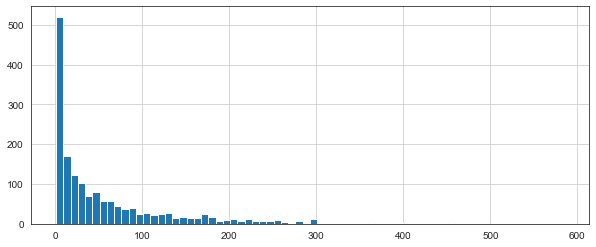

In [36]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

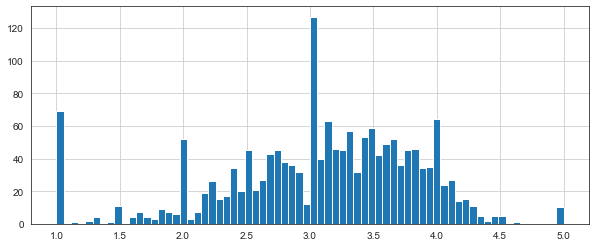

In [37]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

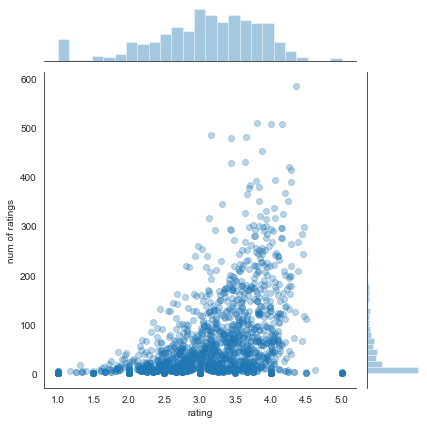

In [38]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.3)

In [39]:
# how it looks with different alphas?

In [40]:
########################
# add "median rating column"
# viz it
# is there a relationship between movie name length to rating? (assume all movies names ends with "(year)")
# how is the std of all the ratings behaves for different median ratings(1,2,3,4,5)? i.e., for high rated movies, 
#  (media=5) is the std of the ratings lower? (no-one hates it...)

In [41]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [42]:
ratings['median'] = df.groupby('title')['rating'].median()

In [43]:
ratings.head()

,rating,num of ratings,median
title,,,
'Til There Was You (1997),2.333333,9,2.0
1-900 (1994),2.600000,5,3.0
101 Dalmatians (1996),2.908257,109,3.0
12 Angry Men (1957),4.344000,125,4.0
187 (1997),3.024390,41,3.0


<AxesSubplot:>

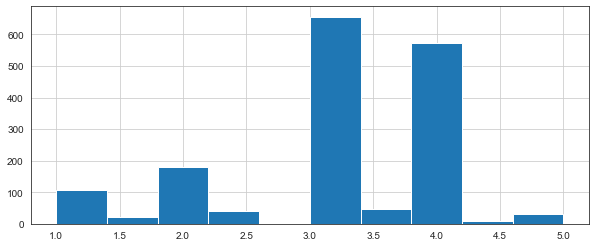

In [44]:
plt.figure(figsize=(10,4))
ratings['median'].hist()

In [45]:
ratings['median']

title
'Til There Was You (1997)                2.0
1-900 (1994)                             3.0
101 Dalmatians (1996)                    3.0
12 Angry Men (1957)                      4.0
187 (1997)                               3.0
                                        ... 
Young Guns II (1990)                     3.0
Young Poisoner's Handbook, The (1995)    4.0
Zeus and Roxanne (1997)                  2.5
unknown                                  4.0
Á köldum klaka (Cold Fever) (1994)       3.0
Name: median, Length: 1664, dtype: float64

In [46]:
ratings['len'] = ratings.index.str.len()
ratings.head()

,rating,num of ratings,median,len
title,,,,
'Til There Was You (1997),2.333333,9,2.0,25
1-900 (1994),2.600000,5,3.0,12
101 Dalmatians (1996),2.908257,109,3.0,21
12 Angry Men (1957),4.344000,125,4.0,19
187 (1997),3.024390,41,3.0,10


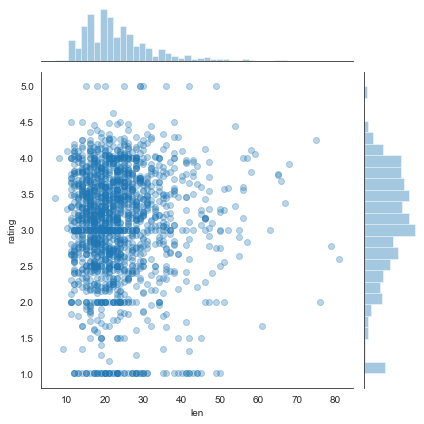

In [47]:
sns.jointplot(x='len', y='rating', data=ratings, alpha=0.3)

In [48]:
ratings['median_cat'] = ratings['median'].apply(round)

In [49]:
ratings.head()

,rating,num of ratings,median,len,median_cat
title,,,,,
'Til There Was You (1997),2.333333,9,2.0,25,2
1-900 (1994),2.600000,5,3.0,12,3
101 Dalmatians (1996),2.908257,109,3.0,21,3
12 Angry Men (1957),4.344000,125,4.0,19,4
187 (1997),3.024390,41,3.0,10,3


In [50]:
ratings['median_cat'] = ratings['median_cat'].astype(str)

In [51]:
ratings.head()

,rating,num of ratings,median,len,median_cat
title,,,,,
'Til There Was You (1997),2.333333,9,2.0,25,2
1-900 (1994),2.600000,5,3.0,12,3
101 Dalmatians (1996),2.908257,109,3.0,21,3
12 Angry Men (1957),4.344000,125,4.0,19,4
187 (1997),3.024390,41,3.0,10,3


In [52]:
df.head(2)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)


In [53]:
ratings.head(2)

,rating,num of ratings,median,len,median_cat
title,,,,,
'Til There Was You (1997),2.333333,9,2.0,25,2
1-900 (1994),2.600000,5,3.0,12,3


In [54]:
df22 = pd.merge(df, ratings.reset_index()[['title', 'median_cat']], on='title')
df22.head()

,user_id,item_id,rating,timestamp,title,median_cat
0,0,50,5,881250949,Star Wars (1977),5
1,290,50,5,880473582,Star Wars (1977),5
2,79,50,4,891271545,Star Wars (1977),5
3,2,50,5,888552084,Star Wars (1977),5
4,8,50,5,879362124,Star Wars (1977),5


<AxesSubplot:ylabel='median_cat'>

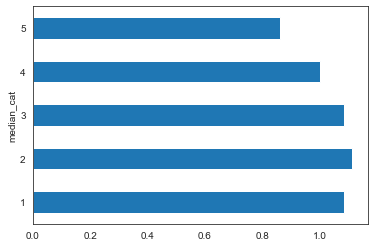

In [55]:
df22.groupby('median_cat')['rating'].std().plot.barh()

In [56]:
ratings.reset_index()

,title,rating,num of ratings,median,len,median_cat
0,'Til There Was You (1997),2.333333,9,2.0,25,2
1,1-900 (1994),2.600000,5,3.0,12,3
2,101 Dalmatians (1996),2.908257,109,3.0,21,3
3,12 Angry Men (1957),4.344000,125,4.0,19,4
4,187 (1997),3.024390,41,3.0,10,3
...,...,...,...,...,...,...
1659,Young Guns II (1990),2.772727,44,3.0,20,3
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41,4.0,37,4
1661,Zeus and Roxanne (1997),2.166667,6,2.5,23,2
1662,unknown,3.444444,9,4.0,7,4


In [57]:
#############################################

In [58]:
df.head(2)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)


Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [59]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#############################################
# do the same with groupby (+unstack)

In [61]:
df.groupby(['user_id', 'title'])['rating'].mean().unstack().head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
################################################

In [63]:
moviemat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 943
Columns: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
dtypes: float64(1664)
memory usage: 12.0 MB


Most rated movie:

In [64]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings,median,len,median_cat
title,,,,,
Star Wars (1977),4.359589,584,5.0,16,5
Contact (1997),3.803536,509,4.0,14,4
Fargo (1996),4.155512,508,4.0,12,4
Return of the Jedi (1983),4.007890,507,4.0,25,4
Liar Liar (1997),3.156701,485,3.0,16,3
"English Patient, The (1996)",3.656965,481,4.0,27,4
Scream (1996),3.441423,478,4.0,13,4
Toy Story (1995),3.878319,452,4.0,16,4
Air Force One (1997),3.631090,431,4.0,20,4


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [65]:
ratings.head()

,rating,num of ratings,median,len,median_cat
title,,,,,
'Til There Was You (1997),2.333333,9,2.0,25,2
1-900 (1994),2.600000,5,3.0,12,3
101 Dalmatians (1996),2.908257,109,3.0,21,3
12 Angry Men (1957),4.344000,125,4.0,19,4
187 (1997),3.024390,41,3.0,10,3


Now let's grab the user ratings for those two movies:

In [66]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [67]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [68]:
#NOTEBOOK: dataframe corr

We can then use corrwith() method to get correlations between two pandas series:

In [69]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [70]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [71]:
similar_to_starwars[similar_to_starwars == 1.0]

title
Commandments (1997)       1.0
Cosi (1996)               1.0
Hollow Reed (1996)        1.0
Man of the Year (1995)    1.0
No Escape (1994)          1.0
Stripes (1981)            1.0
dtype: float64

Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [72]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
# corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [73]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [74]:
ratings.head()

,rating,num of ratings,median,len,median_cat
title,,,,,
'Til There Was You (1997),2.333333,9,2.0,25,2
1-900 (1994),2.600000,5,3.0,12,3
101 Dalmatians (1996),2.908257,109,3.0,21,3
12 Angry Men (1957),4.344000,125,4.0,19,4
187 (1997),3.024390,41,3.0,10,3


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [75]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [76]:
corr_starwars.sort_values(by='num of ratings').head()

,Correlation,num of ratings
title,,
Á köldum klaka (Cold Fever) (1994),NaN,1
Mille bolle blu (1993),NaN,1
Mat' i syn (1997),NaN,1
Marlene Dietrich: Shadow and Light (1996),NaN,1
"Man from Down Under, The (1943)",NaN,1


Now sort the values and notice how the titles make a lot more sense:

In [77]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the same for the comedy Liar Liar:

In [78]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Casper (1995),0.538816,52
Batman & Robin (1997),0.532858,62
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91


In [79]:
#####################################
# do the same for Toy story (animation) and Air Force 1 (Action)
# note: filter num ratings > 200 and make a function for re-use

In [80]:
# make a fucntion

In [81]:
TH = 200
def print_reco(m):
    ts_user_rating =moviemat[m]
    sim_to = moviemat.corrwith(ts_user_rating)
    corr_ts = pd.DataFrame(sim_to, columns=['corr'])
    corr_ts = corr_ts.join(ratings['num of ratings'])
    print(corr_ts[corr_ts['num of ratings']>TH].sort_values('corr',ascending=False).head())

In [82]:
print_reco("Toy Story (1995)")

                                 corr  num of ratings
title                                                
Toy Story (1995)             1.000000             452
Beauty and the Beast (1991)  0.442960             202
Lion King, The (1994)        0.426778             220
Aladdin (1992)               0.411731             219
Top Gun (1986)               0.384972             220


In [83]:
print_reco("Air Force One (1997)")

                                      corr  num of ratings
title                                                     
Air Force One (1997)              1.000000             431
Hunt for Red October, The (1990)  0.554383             227
Murder at 1600 (1997)             0.514906             218
Eraser (1996)                     0.500606             206
Rock, The (1996)                  0.493542             378


In [84]:
#############################################